# SDOT Trees Data Exploration

## TODO

* Create a new column to classify trees by their scientific name, but group very specific cultivars together.
  - Identify any filterable data (e.g. there are trees with name "stump").

# Notes

* The `x` and `y` columns are likely measured in feet based on the State Plane Coordinate System (SPCS) for Washington North (EPSG:2285).

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import json
from typing import Tuple, TypedDict

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [29]:
df_raw = pd.read_csv('SDOT_Trees_CDL_20241119.csv', dtype={
    'CONDITION': 'string',
    'CONDITION_ASSESSMENT_DATE': 'string',
    'ASBUILTPLANNO': 'string',
})

# to squelch warnings about the data
df_raw['CONDITION'] = df_raw['CONDITION'].fillna('')
df_raw['CONDITION_ASSESSMENT_DATE'] = df_raw['CONDITION_ASSESSMENT_DATE'].fillna('')
df_raw['ASBUILTPLANNO'] = df_raw['ASBUILTPLANNO'].fillna('')

# to sanitize the data
df_raw['SCIENTIFIC_NAME'] = df_raw['SCIENTIFIC_NAME'].fillna('')
df_raw['COMMON_NAME'] = df_raw['COMMON_NAME'].fillna('')

df = df_raw
# Filtering out a few trees that are way outside the city range (which causes the maps to render funny).
df = df[df['x'] > 1245000]
df = df[df['y'] < 275000]

In [4]:
print(df_raw.columns)

Index(['OBJECTID', 'COMPKEY', 'UNITID', 'UNITDESC', 'CONDITION',
       'CONDITION_ASSESSMENT_DATE', 'CURRENT_STATUS', 'PRIMARYDISTRICTCD',
       'SECONDARYDISTRICTCD', 'OVERRIDEYN', 'COMPTYPE', 'SEGKEY', 'UNITTYPE',
       'OWNERSHIP', 'CURRENT_STATUS_DATE', 'LAST_VERIFY_DATE', 'PLANTED_DATE',
       'BOTANICAL_NAME', 'SCIENTIFIC_NAME', 'HERITAGE', 'EXCEPTIONAL',
       'CODEREQ', 'GSI', 'GREEN_FACTOR', 'WIRES', 'CABLED',
       'CLEARANCE_PROBLEM', 'SPACETYPE', 'SITETYPE', 'GROWSPACE', 'DIAM',
       'CONDITION_RATING', 'FUNDING_SOURCE', 'WATER_THROUGH_YR1',
       'WATER_THROUGH_YR2', 'WATER_THROUGH_YR3', 'OWNERDIAM', 'EXPDATE',
       'COMMON_NAME', 'TREEHEIGHT', 'ASBUILTPLANNO', 'LANDSCAPEAREAASSOC',
       'COMMENTS', 'OVERRIDECOMMENT', 'SHAPE_LNG', 'SHAPE_LAT',
       'IRRIGATESYSYN', 'ASSETGROUPID', 'ASSETGROUPDESC', 'MODDATE',
       'TOTAL_RANK', 'TOTAL_COUNT', 'GENUS', 'UFMAINTMGMTUNIT', 'x', 'y'],
      dtype='object')


In [40]:
dftrees = pd.read_csv('data/trees_of_seattle.csv', sep='|')
# Filtering out a few trees that are way outside the city range (which causes the maps to render funny).
dftrees = dftrees[dftrees['x'] > 1245000]
dftrees = dftrees[dftrees['y'] < 275000]
with open('data/trees_of_seattle.csv.metadata.json') as fin:
    dftrees_metadata_raw = fin.read()
    dftrees_metadata = json.loads(dftrees_metadata_raw)
print('Metadata for trees_of_seattle.csv:')
print()
print(dftrees_metadata_raw)
del dftrees_metadata_raw

Metadata for trees_of_seattle.csv:

{
  "version": "1",
  "record_count": 254898
}



In [5]:
print(df_raw[:4])

   OBJECTID  COMPKEY       UNITID             UNITDESC CONDITION  \
0  72121582   218151    TRE-50439          2033 1ST AV             
1  72121583   218188    TRE-50476         1810 6TH AVE             
2  72121584   229512    TRE-61800        555 N 73RD ST             
3  72121585   349628  TRE-1032635  10745 PALATINE AV N             

  CONDITION_ASSESSMENT_DATE CURRENT_STATUS PRIMARYDISTRICTCD  \
0                                    INSVC         DISTRICT7   
1                                    INSVC         DISTRICT7   
2                                  REMOVED         DISTRICT6   
3                                  REMOVED         DISTRICT5   

  SECONDARYDISTRICTCD OVERRIDEYN  ...  IRRIGATESYSYN  ASSETGROUPID  \
0                 NaN          N  ...              N                 
1                 NaN          N  ...              N                 
2                 NaN          N  ...              N                 
3                 NaN          N  ...              N      

## Some Specific Trees

In [11]:
print(df[df['SCIENTIFIC_NAME'].str.startswith('Pseudotsuga')]['SCIENTIFIC_NAME'].value_counts())
print()
print(df[df['COMMON_NAME'].str.startswith('Bristle')]['SCIENTIFIC_NAME'].value_counts())
print()
#print(df[df['SCIENTIFIC_NAME'].str.startswith('Prunus')]['SCIENTIFIC_NAME'].value_counts())
#print()

#df[df['COMMON_NAME'].str.startswith('Bristle')]

SCIENTIFIC_NAME
Pseudotsuga menziesii    2435
Name: count, dtype: int64

SCIENTIFIC_NAME
Pinus aristata    27
Name: count, dtype: int64



## Where Are These Trees?

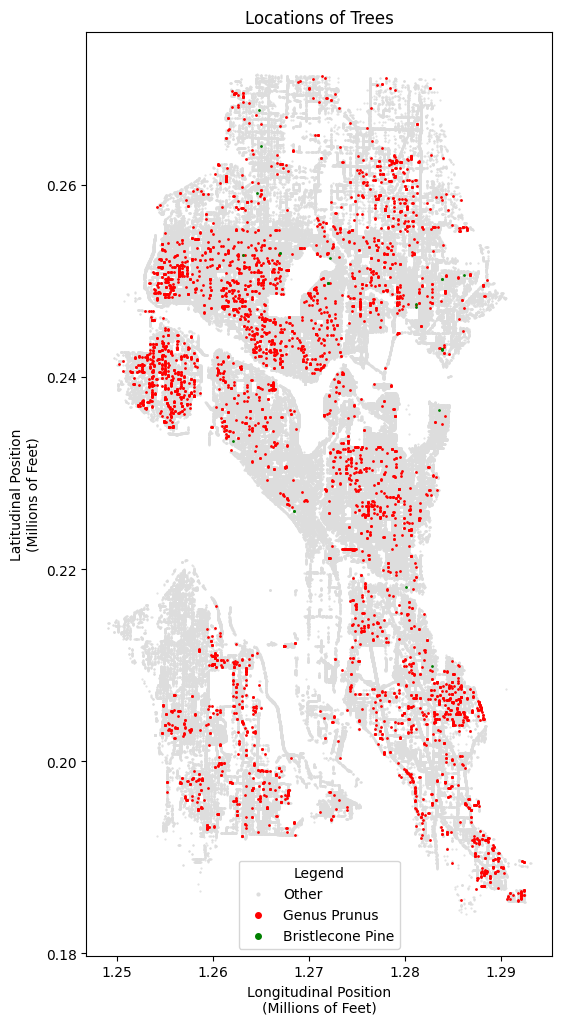

In [28]:
apples = df[df['SCIENTIFIC_NAME'].str.startswith('Malus')]
dfirs = df[df['SCIENTIFIC_NAME'].str.startswith('Pseudotsuga')]
bristles = df[df['SCIENTIFIC_NAME'] == 'Pinus aristata']
prunus = df[df['SCIENTIFIC_NAME'] == 'Prunus sp.']

# Plot the location of trees in the city.
fig, ax = plt.subplots(figsize=(12, 12))  # x-dimension gets "forgotten" after set_aspect().

def scale_formatter(value, tick_number):
    return f'{value / 1_000_000.0:.2f}'

ax.xaxis.set_major_formatter(ticker.FuncFormatter(scale_formatter))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(scale_formatter))

ax.scatter(df['x'], df['y'], s=.25, color='#DDD', label='Other')
ax.scatter(prunus['x'], prunus['y'], s=1, color='red', label='Genus Prunus')
ax.scatter(bristles['x'], bristles['y'], s=1, color='green', label='Bristlecone Pine')

ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('Longitudinal Position\n(Millions of Feet)')
ax.set_ylabel('Latitudinal Position\n(Millions of Feet)')
ax.set_title('Locations of Trees')
ax.legend(scatterpoints=1, markerscale=4, title='Legend')

plt.show()

In [28]:
df[df['SCIENTIFIC_NAME'] == 'Malus sp.']['COMMON_NAME'].value_counts()

COMMON_NAME
Apple/Crabapple    7016
Name: count, dtype: int64

In [45]:
dftrees[['genus', 'local', 'indigenous']].value_counts()[:35]

genus           local  indigenous
Acer            False  False         45743
Prunus          False  False         38942
Malus           False  False         12085
Quercus         False  False          9351
Cornus          False  False          8880
Pyrus           False  False          6882
Crataegus       True   False          6655
Planting        False  False          6020
Fraxinus        False  False          5750
Tilia           False  False          5195
Liquidambar     False  False          4995
Carpinus        False  False          4959
Acer            True   True           4905
Magnolia        False  False          4786
Amelanchier     False  False          4475
Ulmus           False  False          3866
Styrax          False  False          3831
Betula          True   False          3299
Prunus          True   False          2954
Cercidiphyllum  False  False          2781
Pinus           False  False          2654
Zelkova         False  False          2601
Thuja           True

In [49]:
dftrees[dftrees['genus'] == 'Acer'][['scientificname', 'local', 'indigenous']].value_counts()

scientificname                  local  indigenous
Acer palmatum                   False  False         8001
Acer rubrum                     False  False         7504
Acer platanoides                False  False         6463
Acer truncatum x A platanoides  False  False         4300
Acer griseum                    False  False         3212
Acer macrophyllum               True   True          2966
Acer circinatum                 True   True          1669
Acer rubrum Red Sunset (R)      False  False         1427
Acer pseudoplatanus             False  False         1420
Acer campestre                  False  False         1206
Acer saccharum                  False  False         1034
Acer tataricum ssp.Ginnala `Fl  False  False          909
Acer x Freemanii                False  False          786
Acer x Freemanii `Armstrong`    False  False          786
Acer tataricum ssp. Ginnala     False  False          732
Acer sp.                        False  False          731
Acer platanoides 'Emer

In [33]:
df[df['SCIENTIFIC_NAME'].str.startswith('Prunus')]['SCIENTIFIC_NAME'].value_counts()

SCIENTIFIC_NAME
Prunus cerasifera cv/hyb          6176
Prunus serrulata                  5280
Prunus cerasifera `Thunderclou    4987
Prunus sp.                        4639
Prunus  `Kwanzan` (Sato Zakura    4320
Prunus x blireiana                4229
Prunus avium                      1642
Prunus x subhirtella              1047
Prunus x domestica                1008
Prunus x subhirtella `Autumnal     997
Prunus x yedoensis `Akebono`       910
Prunus x yedoensis                 793
Prunus  `Shirotae` (Sato Zakur     732
Prunus laurocerasus                717
Prunus pendula                     625
Prunus  `Amanogawa` (Sato Zaku     533
Prunus sargentii                   305
Prunus cerasus                     292
Prunus cerasifera `Krauter`s V     286
Prunus persica                     276
Prunus  `Accolade`                 225
Prunus  `Okame`                    214
Prunus serrula                     207
Prunus  `Newport`                  190
Prunus serotina                    158
Prunus  `